# **Binary classification of Loan Approval Prediction**

Given with a dataset containing information on loan applicants, including their contact information and the status of their loan application. A binary classification model must be built with the highest level of accuracy.

# **Importing necessary Libraries**

In [ ]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

# **Importing the Dataset**

In [ ]:
input = pd.read_csv("/content/loan_prediction.csv")
input.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural,Y
184,LP001639,Female,Yes,0,Graduate,No,3625,0.0,108.0,360.0,1.0,Semiurban,Y
280,LP001910,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban,N
213,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
378,LP002224,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,N


# **Information of the dataset**

In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Shape of the Dataset**

In [ ]:
input.shape

(614, 13)

# **Let's examine Categorical columns first:**

In [ ]:
categorical_columns = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


**Visualizing the Categorical values of the Dataset:**

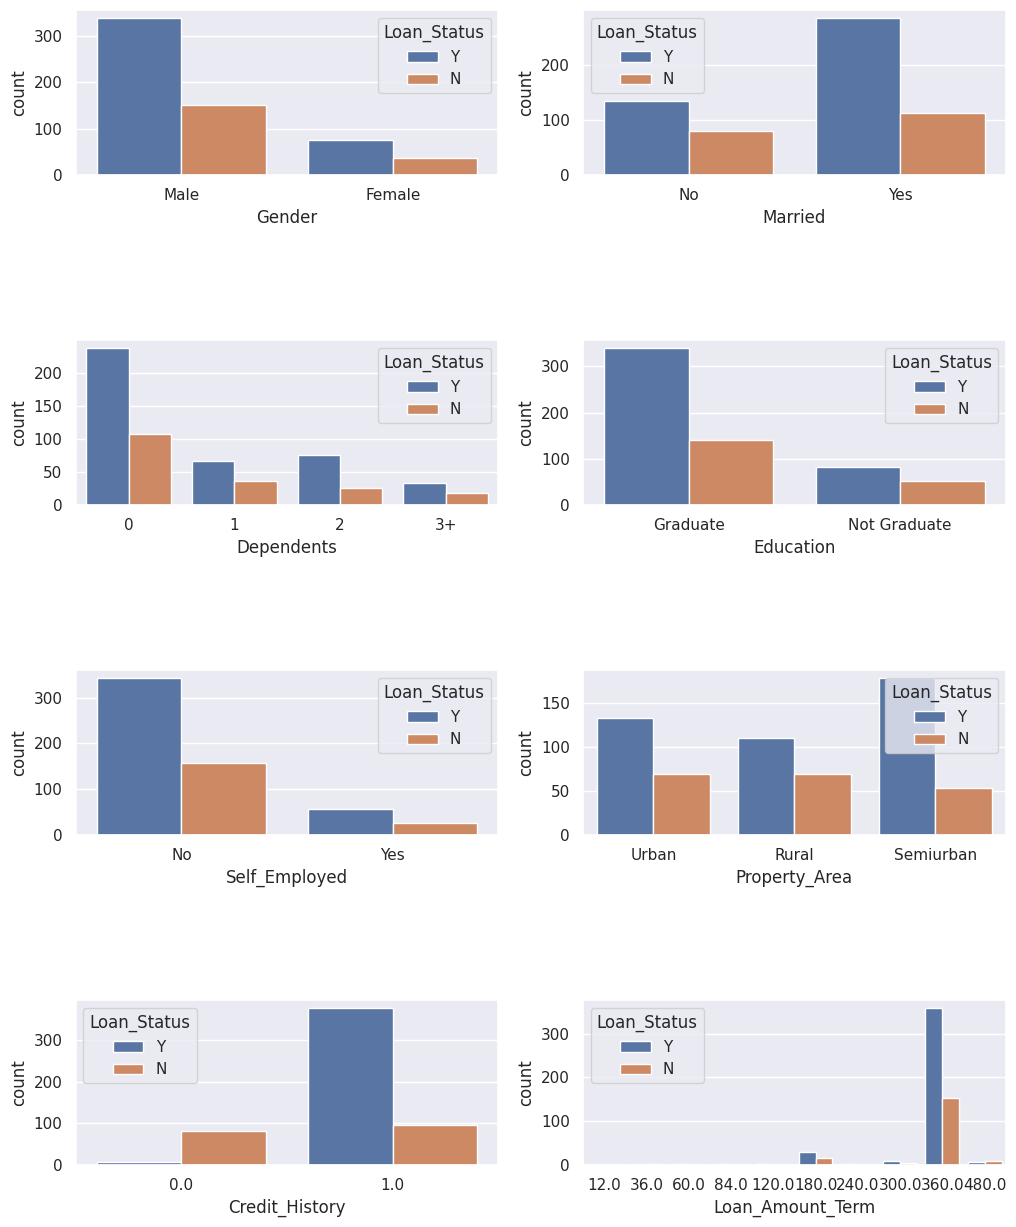

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=input,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

**Loan Approval Status:** Approximately two thirds of applicants received a
loan.

**Sex Ratio:** Men outnumber women by around three times (sex).

**Marital Status:** Married applicants are more likely to be approved for loans because they make up two-thirds of the population in the dataset.

**Dependents:** The vast majority of people have no dependents, making them more likely to be approved for loans.

**Education:** Graduates make up about 5/6 of the population and have a higher chance of getting loans approved.

**Employment:** In terms of employment, just 5/6 of people are independent contractors.

**Property Area:** Semi-urban applicants are more likely to get approved for loans.

**Credit history:** Applications with a credit history have a far higher chance of being approved.

**Loan Quantity Term:** The majority of loans are 360 months long (30 years).


























# **Let's examine numerical columns next:**

In [ ]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


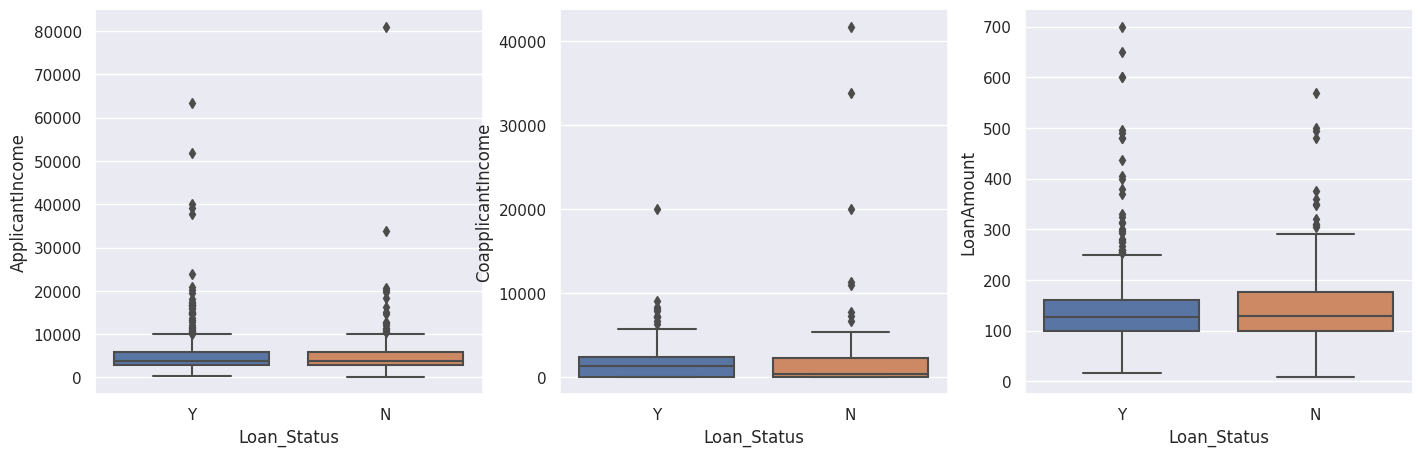

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=input,x='Loan_Status',ax=axes[idx])

print(input[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

**There is no meaningful correlation between Loan Approval Status and Numerical Columns.**


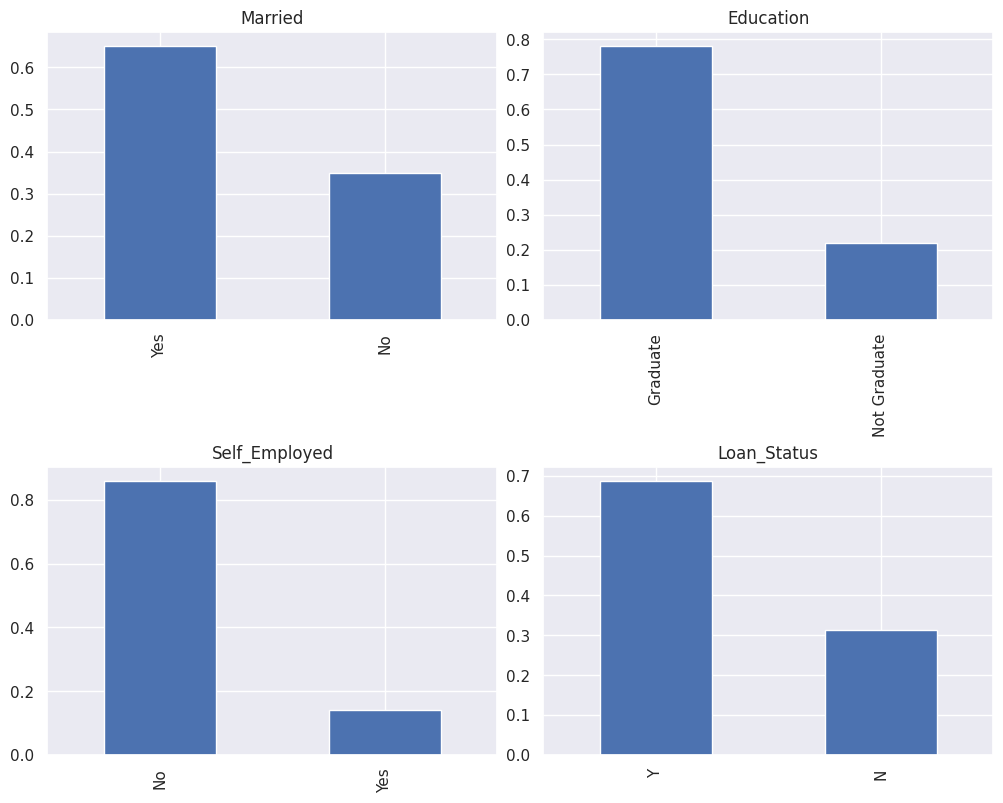

In [ ]:
plt.subplot(221)
input.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married",figsize=(10,8))
plt.tight_layout(pad=0.5)
plt.subplot(222)
input.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)
plt.subplot(223)
input.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)
plt.subplot(224)
input.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

**NOTE:**

1.   In the training dataset, men make up 80% of loan applications.
2.   Graduates make up about 75% of loan applicants.
3.   Nearly 85–90% of loan applicants are independent contractors.
4.   More than 65% of applicants have had their loan requests accepted.
5.   Almost 70% of people are Married.









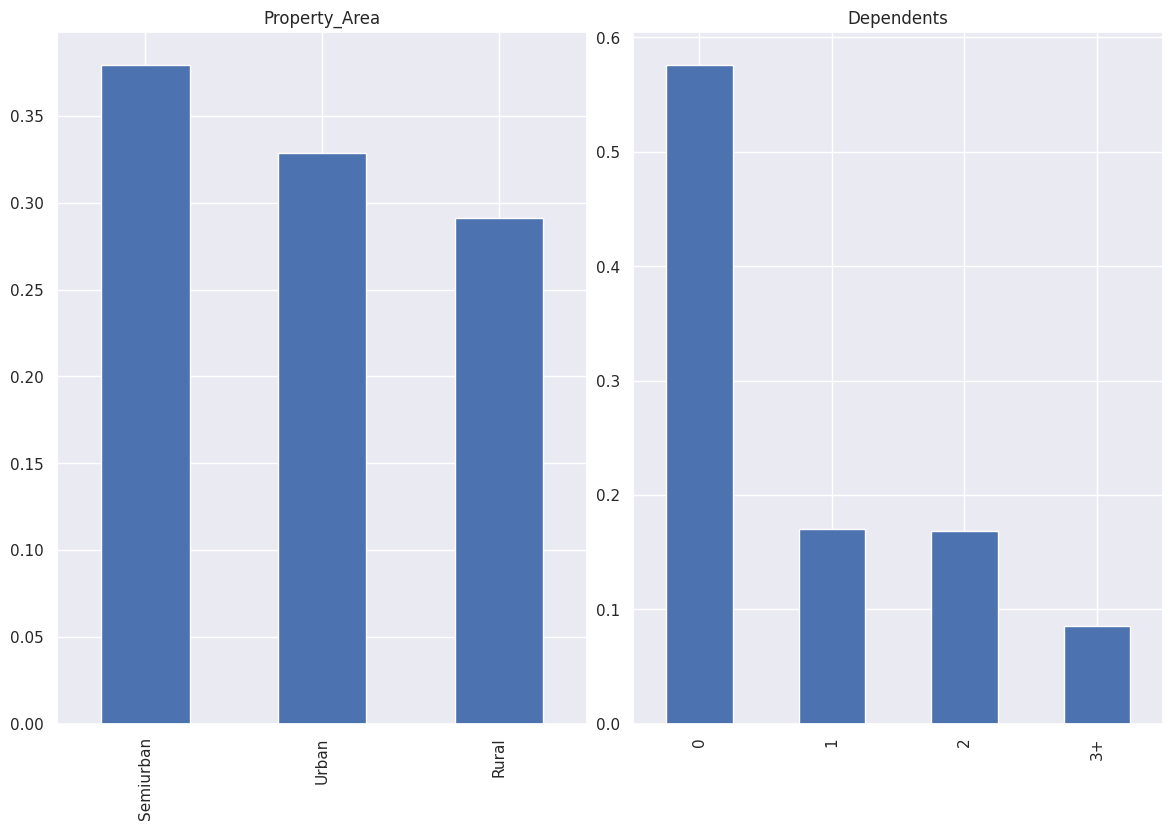

In [ ]:
plt.subplot(121)
input.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)
plt.subplot(122)
input.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

**NOTE:**



1.   Nearly 58% of the candidates are single.
2.   Following urban areas in terms of applicant volume are semi-urban locations.



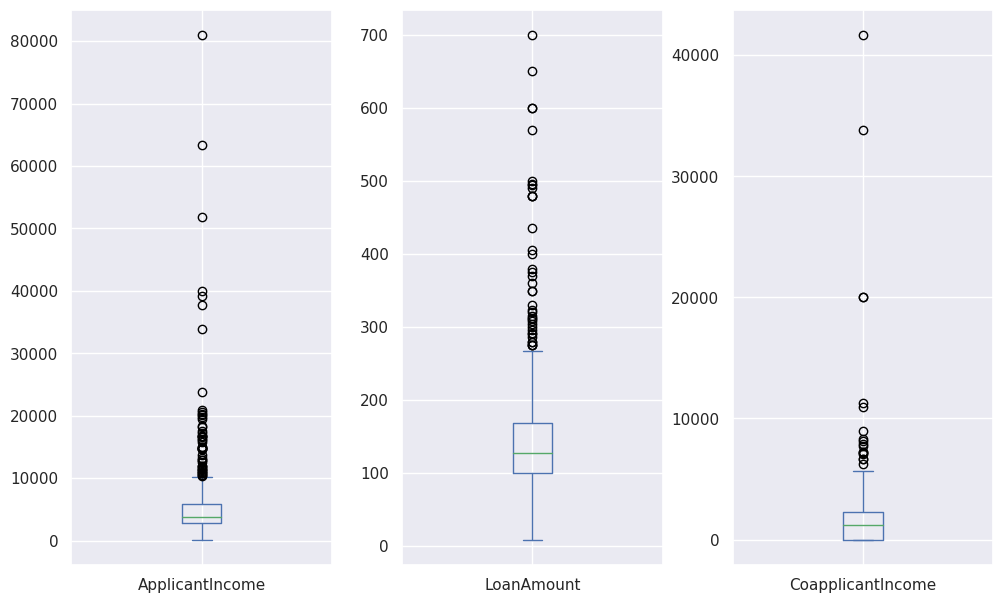

In [ ]:
plt.subplot(131)
input['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
input['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
input['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

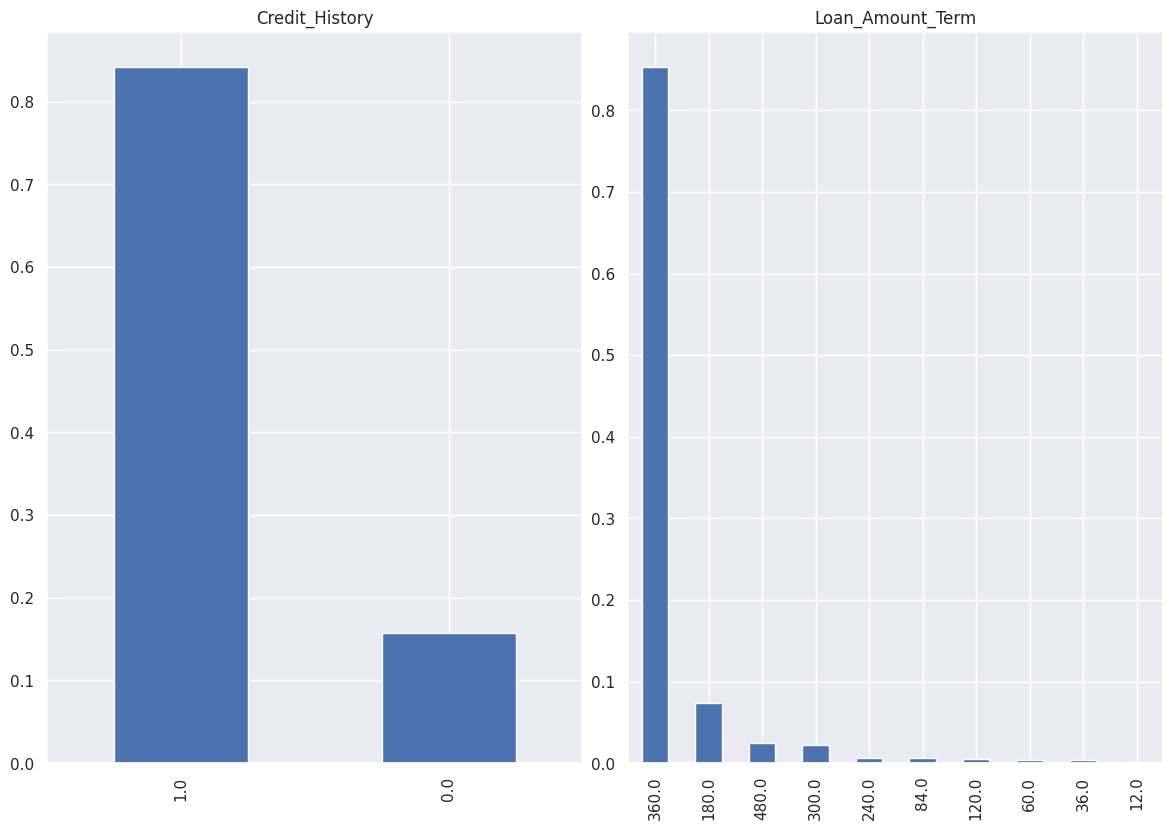

In [ ]:
plt.subplot(121)
input.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)
plt.subplot(122)
input.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

**NOTE:**


*   85% of applicants have just one credit history.
*   The standard loan is disbursed for 360 days.
*   With a few outliers, the applicant's salary typically falls between 10,000 and 40,000.
*   The coapplicant's income, which is less than the applicant's income and ranges from 5,000 to 15,000 with some outliers once more, is less than the applicant's income.
*   The majority of the loan is concentrated between 250 and 500.












**Plots for various categorical variables with respect to the 'Loan_Status' variable**

<Axes: xlabel='Property_Area', ylabel='count'>

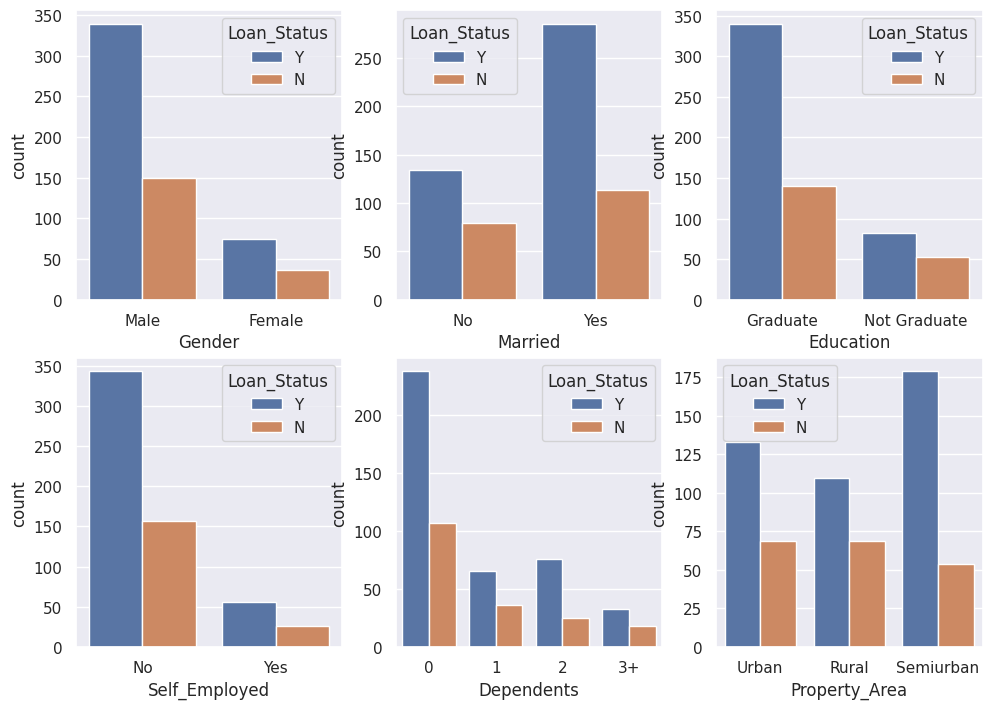

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=input)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=input)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=input)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=input)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=input)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=input)

**NOTE:**


*   Men and women receive approbation at about the same percentages, which is not very significant.
*   For married borrowers, there is a somewhat better chance of loan approval.
*   Borrowers who are self-employed and those who are not do not have significantly different loan approval rates.
*   Applicants without dependents or with two dependents are more likely to be accepted. This is not actually correlated, though.
*   Applicants with residences in semi-urban areas have better acceptance rates for loans.
*   Graduates are more likely than non-graduates to get their loan request granted.








**A grid of histograms showing the distribution of 'ApplicantIncome' for different genders ('Male' and 'Female') separately.**

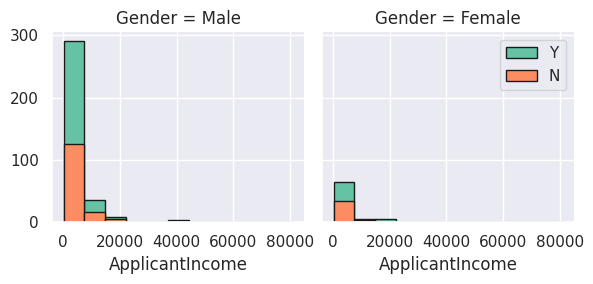

In [ ]:
bins = np.linspace(input.ApplicantIncome.min(), input.ApplicantIncome.max(),12)
graph = sns.FacetGrid(input, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

**histograms for different variables ('LoanAmount' and 'CoapplicantIncome') with respect to the 'Gender' variable.**

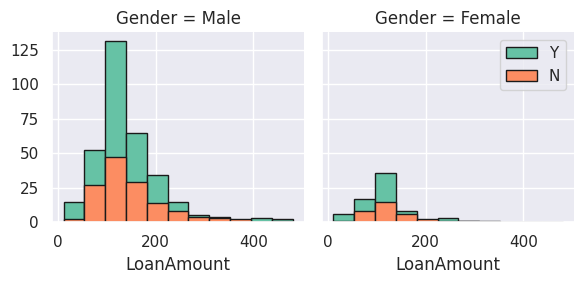

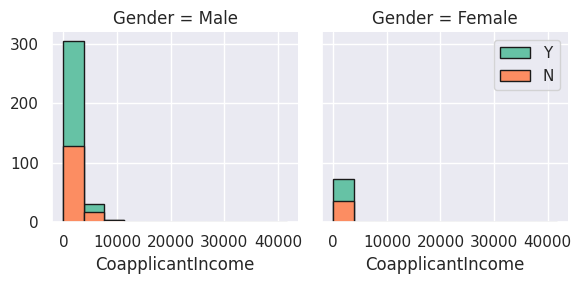

In [ ]:
bins = np.linspace(input.Loan_Amount_Term.min(), input.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(input, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(input.CoapplicantIncome.min(), input.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(input, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

**NOTE:**


*   Women with earnings exceeding $7,000 are more likely to have their loan requests granted.
*   Women seem to borrow less money than men do.
*   Female applicants had lower coapplicant income than male applicants. But it doesn't actually have a big impact on the loan_status.







# **Correlation matrix for the DataFrame- Input**

In [ ]:
correlation_mat = input.corr()

<Axes: >

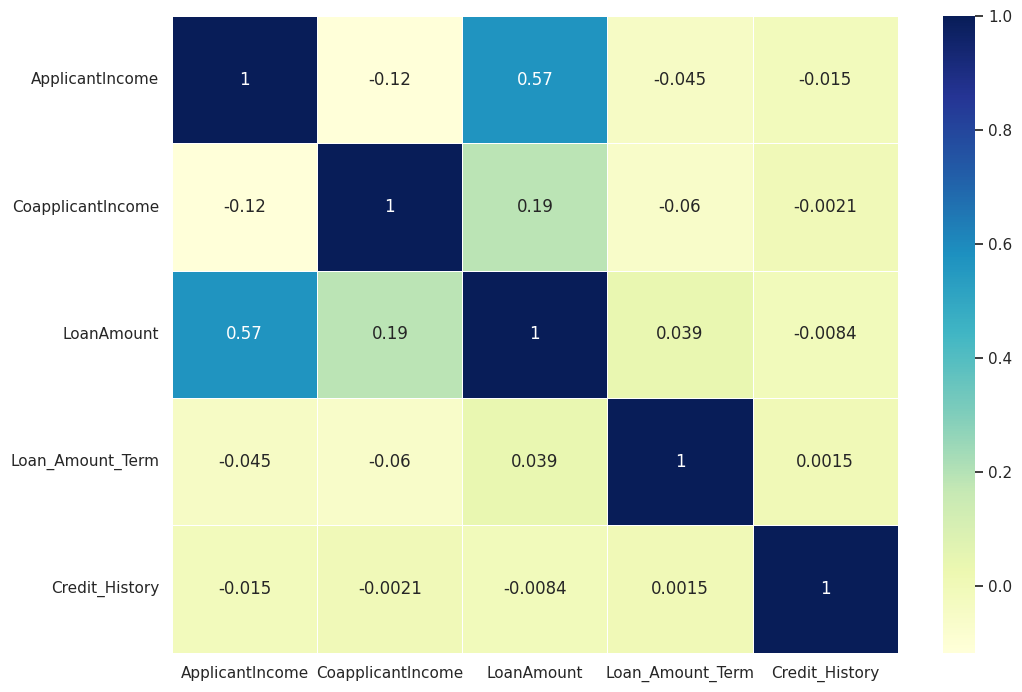

In [ ]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

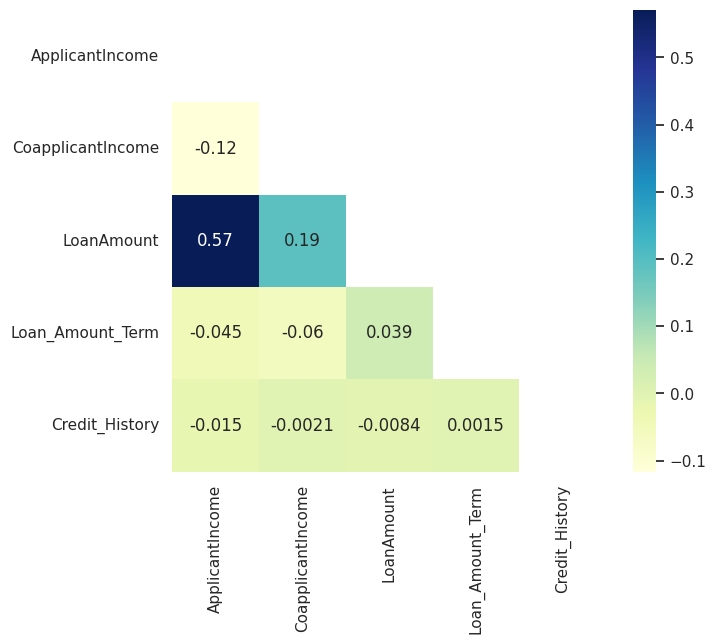

In [ ]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

**NOTE:**
There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

**The pair plot will contain scatter plots for each combination of numeric variables, showing how they are related to each other. The diagonal plots represent the distributions of individual variables. The plots below the diagonal are mirrored with respect to those above the diagonal, as they represent the same relationships but with the axes swapped.**

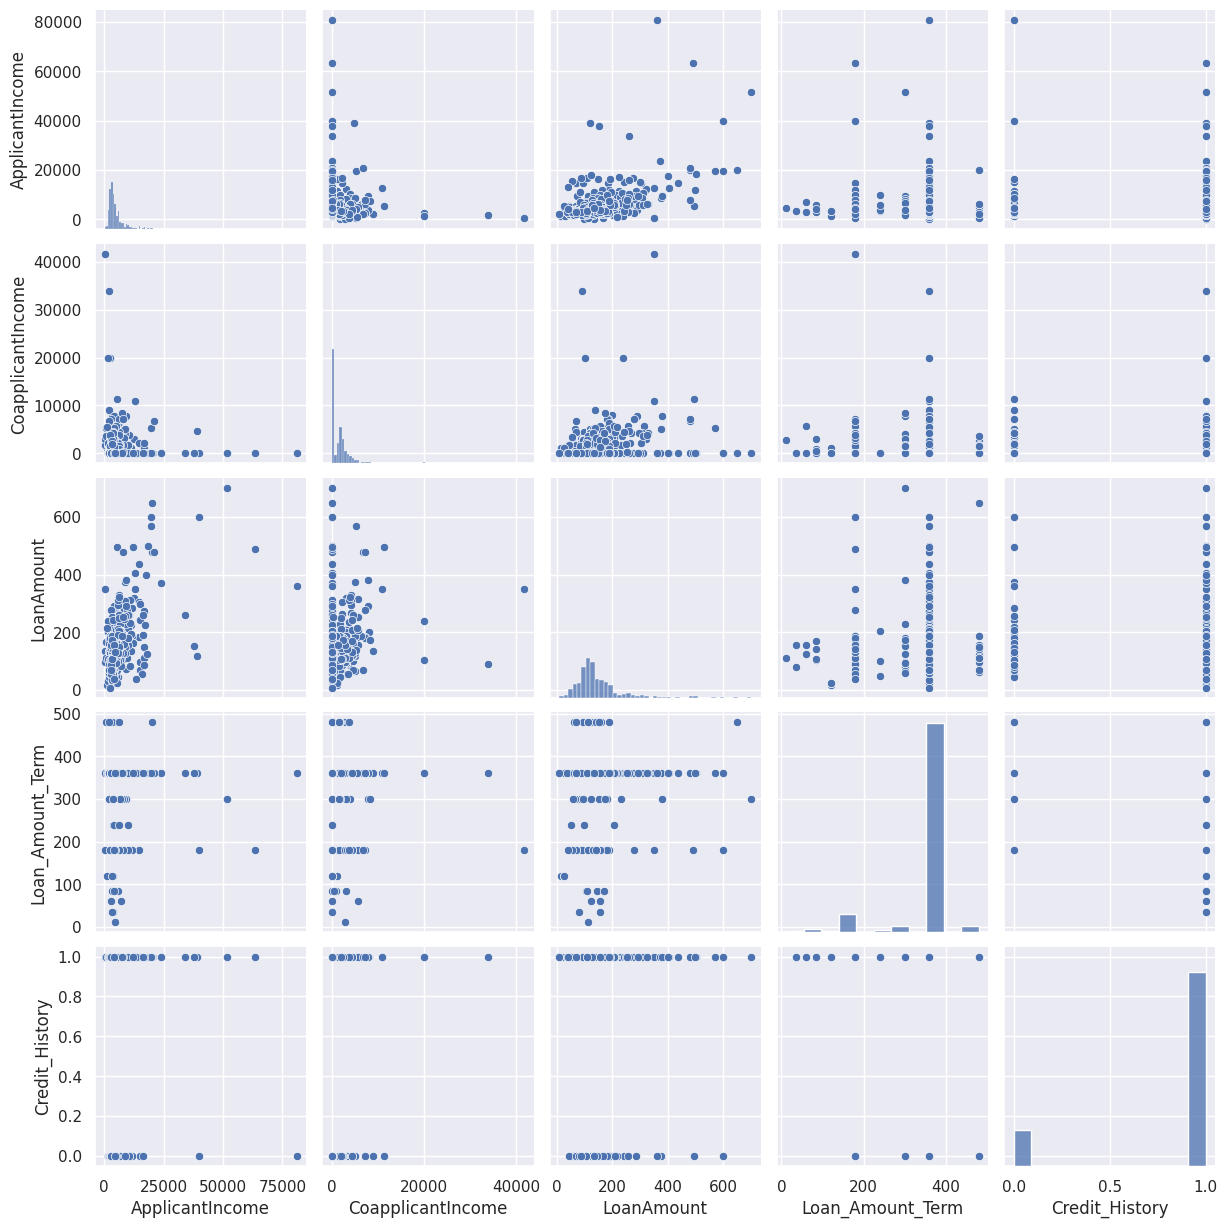

In [ ]:
sns.pairplot(input)
plt.show()

In [ ]:
input.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
input.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

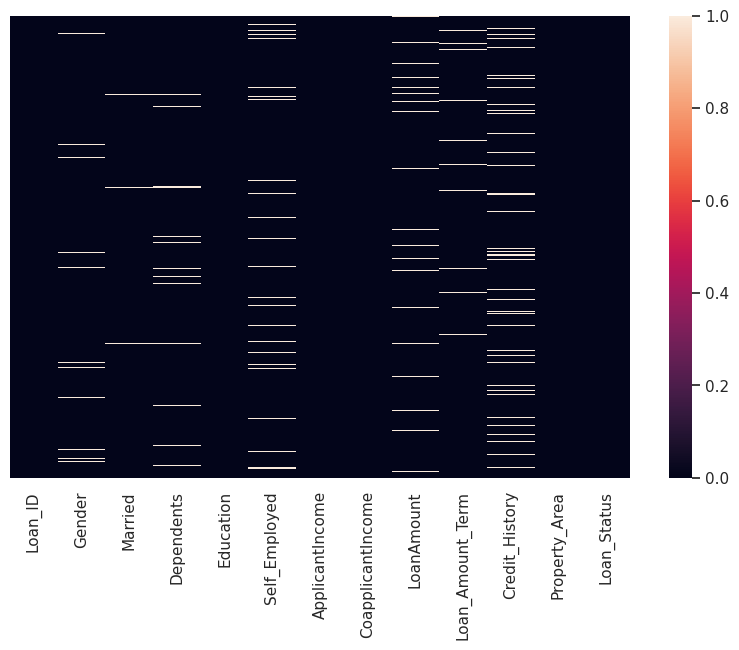

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(input.isnull(),yticklabels=False)

**NOTE:**




Normal Distribution Central limit theorem In simple language we can say that maximum amount of data / or maximum number of data points are near the Mean of the all data points.

To validate he normal distribution of the data:- Mean Mode Median are Equal.

We can identify the distribution of entire data with the help of Mean and Standard Deviation.

When the data is normally distributed maximum data is centralized near the mean value of the data.

To get understanding of distribtuion we can simply plot Distribution plot i.e. Simple Histogram.

Normally Distributed data represents a Bell Shaped curve.

Also Mean , Mode , Median on Normaly Distributed data are equal (Mean=Mode=Median)

One more method is to calculate mean which should be 0 or near to 0 and Standard deviation 1 or near 1.

Mean = sum(All Data Points)/count(Data Points)

Standard Deviation = Root of { sum [Square (each data point - mean of whole data) ] }

#**To Check outliners**
To check if the Non-Categorical variables are Normally Distributed or Not

**MEAN**

In [ ]:
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(input["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(input["LoanAmount"]))






Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  146.41216216216216


**MODE**

In [ ]:
print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(input["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(input["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(input["LoanAmount"])[0])



Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [nan]


**MEDIAN**

In [ ]:
print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(input["CoapplicantIncome"]))
print("LoanAmount: ",np.median(input["LoanAmount"]))



Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  nan


** STANDARD DEVIATION**

In [ ]:
print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(input["CoapplicantIncome"]))
print("LoanAmount: ",np.std(input["LoanAmount"]))


Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  85.51500809120331


**To visualize the distributions of "ApplicantIncome","CoapplicantIncome", and "LoanAmount" using Histogram**

In [ ]:
#Creating a histogram for "ApplicantIncome"
fig = px.histogram(input, x="ApplicantIncome")
fig.update_layout(title="Applicant Income Distribution")
fig.show()

#Creating a histogram for "CoapplicantIncome"
fig = px.histogram(input, x="CoapplicantIncome")
fig.update_layout(title="Coapplicant Income Distribution")
fig.show()

#Creating a histogram for "LoanAmount"
fig = px.histogram(input, x="LoanAmount")
fig.update_layout(title="Loan Amount Distribution")
fig.show()


The above shows that the data isn't normally distributed.



**Now prepare the data for model training that is to remove outliners, Filling NULL values and removing Skewness**

In [ ]:
#To check the value count of several categorical variables in the Dataset
print("\nValue count of categorical values\n")
print(input["Gender"].value_counts())
print(input["Married"].value_counts())
print(input["Self_Employed"].value_counts())
print(input["Dependents"].value_counts())
print(input["Credit_History"].value_counts())
print(input["Loan_Amount_Term"].value_counts())



Value count of categorical values

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


**Filling all Nan values with mode of respective variable**

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

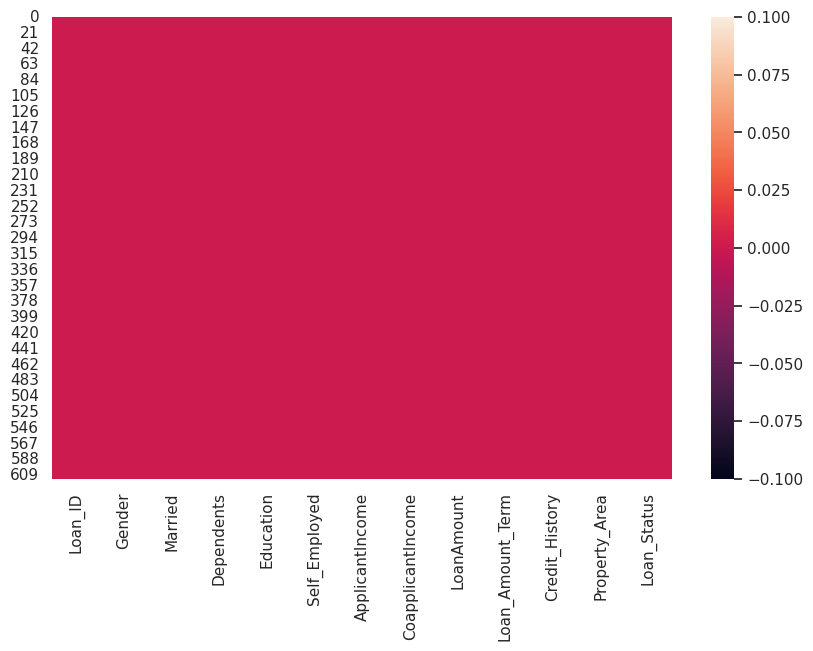

In [ ]:
from IPython.core.error import InputRejected

input["Gender"].fillna(input["Gender"].mode()[0],inplace=True)
input["Married"].fillna(input["Married"].mode()[0],inplace=True)
input["Self_Employed"].fillna(input["Self_Employed"].mode()[0],inplace=True)
input["Loan_Amount_Term"].fillna(input["Loan_Amount_Term"].mode()[0],inplace=True)
input["Dependents"].fillna(input["Dependents"].mode()[0],inplace=True)
input["Credit_History"].fillna(input["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
input["Dependents"] = input["Dependents"].replace('3+',int(3))
input["Dependents"] = input["Dependents"].replace('1',int(1))
input["Dependents"] = input["Dependents"].replace('2',int(2))
input["Dependents"] = input["Dependents"].replace('0',int(0))

input["LoanAmount"].fillna(input["LoanAmount"].median(),inplace=True)

print(input.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(input.isnull())

**Treating outliers and Converting data to Normal Distribution**


Before removing outlier

In [ ]:
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(input["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(input["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(input["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(input["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(input["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(input["CoapplicantIncome"]))
print("LoanAmount: ",np.median(input["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(input["CoapplicantIncome"]))
print("LoanAmount: ",np.std(input["LoanAmount"]))



Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [128.]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  84.03871423798937


In [ ]:
#Creating a histogram for "ApplicantIncome"
fig = px.histogram(input, x="ApplicantIncome")
fig.update_layout(title="Applicant Income Distribution")
fig.show()

#Creating a histogram for "CoapplicantIncome"
fig = px.histogram(input, x="CoapplicantIncome")
fig.update_layout(title="Coapplicant Income Distribution")
fig.show()

#Creating a histogram for "LoanAmount"
fig = px.histogram(input, x="LoanAmount")
fig.update_layout(title="Loan Amount Distribution")
fig.show()


In [ ]:
print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(input["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(input["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(input["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(input["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(input["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(input["CoapplicantIncome"]))
print("LoanAmount: ",np.median(input["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(input["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(input["CoapplicantIncome"]))
print("LoanAmount: ",np.std(input["LoanAmount"]))

---------------------------After converting to Normal Distributed data----------------------

Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [128.]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  84.03871423798937


In [ ]:
#Creating a histogram for "ApplicantIncome"
fig = px.histogram(input, x="ApplicantIncome")
fig.update_layout(title="Applicant Income Distribution")
fig.show()

#Creating a histogram for "CoapplicantIncome"
fig = px.histogram(input, x="CoapplicantIncome")
fig.update_layout(title="Coapplicant Income Distribution")
fig.show()

#Creating a histogram for "LoanAmount"
fig = px.histogram(input, x="LoanAmount")
fig.update_layout(title="Loan Amount Distribution")
fig.show()

Now we can see that Bell Curve for all three variables and data is normally distributed now.

In [ ]:
input.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
input["Gender"] = le.fit_transform(input["Gender"])
input["Married"] = le.fit_transform(input["Married"])
input["Education"] = le.fit_transform(input["Education"])
input["Self_Employed"] = le.fit_transform(input["Self_Employed"])
input["Property_Area"] = le.fit_transform(input["Property_Area"])
input["Loan_Status"] = le.fit_transform(input["Loan_Status"])

#data = pd.get_dummies(data)
input.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Feature Importance In order to create best predictive model we need to best understand the available data and get most information from the data.

In multivariate data it is important to understand the iortance of varialbes and how much they are contributing towards the target variable. Such that we can remove unnecessary variables to increase model performance.

Many times dataset consists of exta columns which do not identically serve information to classify the data. This leads in Wrong Assumption of model while training.

To understand the importance of the data we are going to use Machine Learning classifiers and then will plot bar graph based on importance.

Also XGBoost has built-in Feature Importance Plotting tool which we are going to use.

Using more than one classifier will increase the confidence on our assumption of which variables to keep and which to remove.



#**Dividing data into Input X variables and Target Y variable**

In [ ]:

X = input.drop(["Loan_Status","Loan_ID"],axis=1)
y = input["Loan_Status"]

Feature importance by XGBoost:->

Gender -> 0.032498196
Married -> 0.03846162
Dependents -> 0.042435512
Education -> 0.062977344
Self_Employed -> 0.043533668
ApplicantIncome -> 0.043603152
CoapplicantIncome -> 0.057352304
LoanAmount -> 0.045793608
Loan_Amount_Term -> 0.049817037
Credit_History -> 0.53902644
Property_Area -> 0.04450115


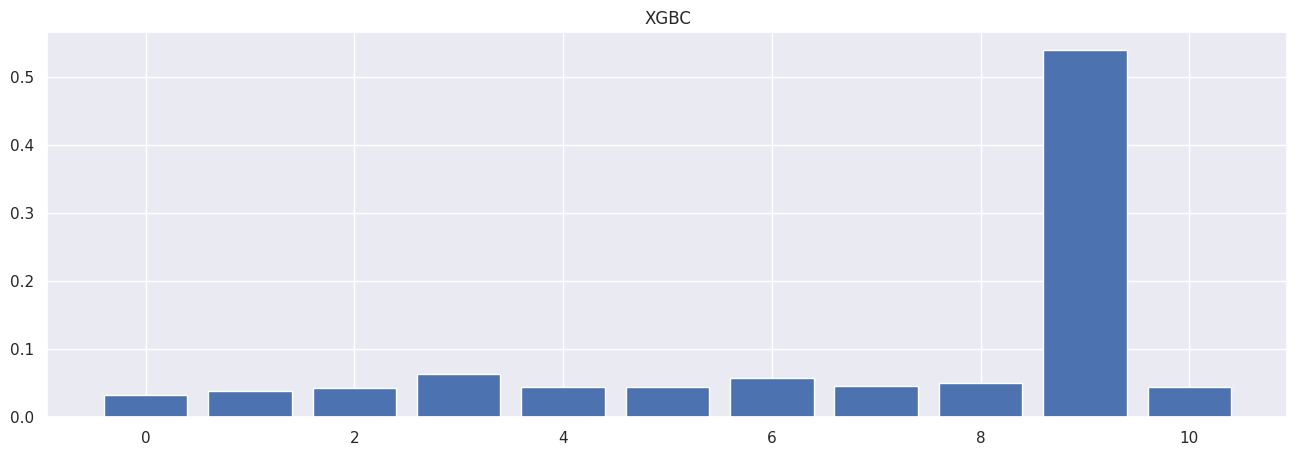

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

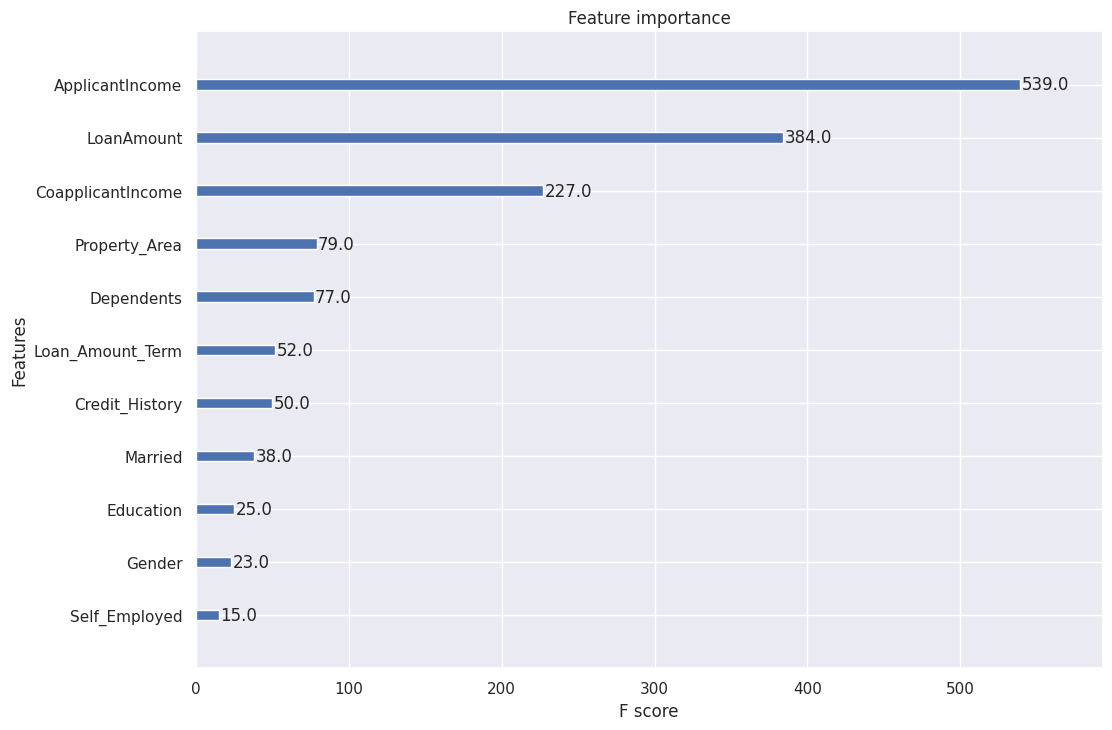

In [ ]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

Feature importance by Random Forest:->

Gender -> 0.01835267032040999
Married -> 0.023676026619744613
Dependents -> 0.050257382436577167
Education -> 0.023724939685472863
Self_Employed -> 0.01691219512793045
ApplicantIncome -> 0.21043165393611435
CoapplicantIncome -> 0.11765473324391715
LoanAmount -> 0.18639866618750145
Loan_Amount_Term -> 0.044037382381631636
Credit_History -> 0.26207010217700055
Property_Area -> 0.046484247883699724


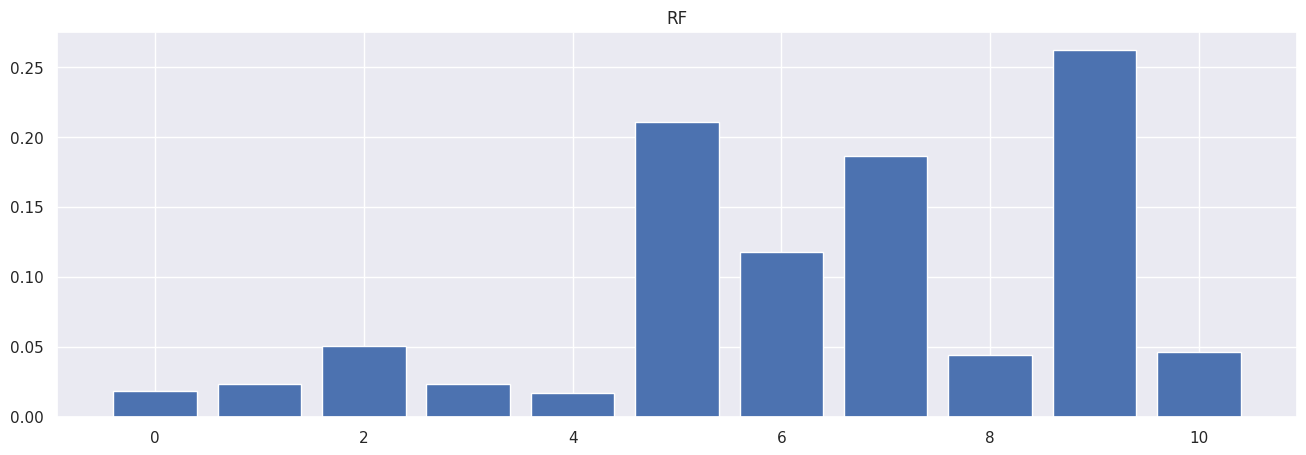

In [ ]:
print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

Feature importance by Suppoprt Vector Machine:->

Gender -> 0.9100356521208957
Married -> 2.491949890024941
Dependents -> 0.8303950062536529
Education -> -1.7578197375862228
Self_Employed -> -2.0
ApplicantIncome -> 0.0008018551670829765
CoapplicantIncome -> -0.0007207786038634367
LoanAmount -> 0.03680257274811538
Loan_Amount_Term -> 0.0005327145188402937
Credit_History -> 22.000000000001815
Property_Area -> 0.15697728965433022


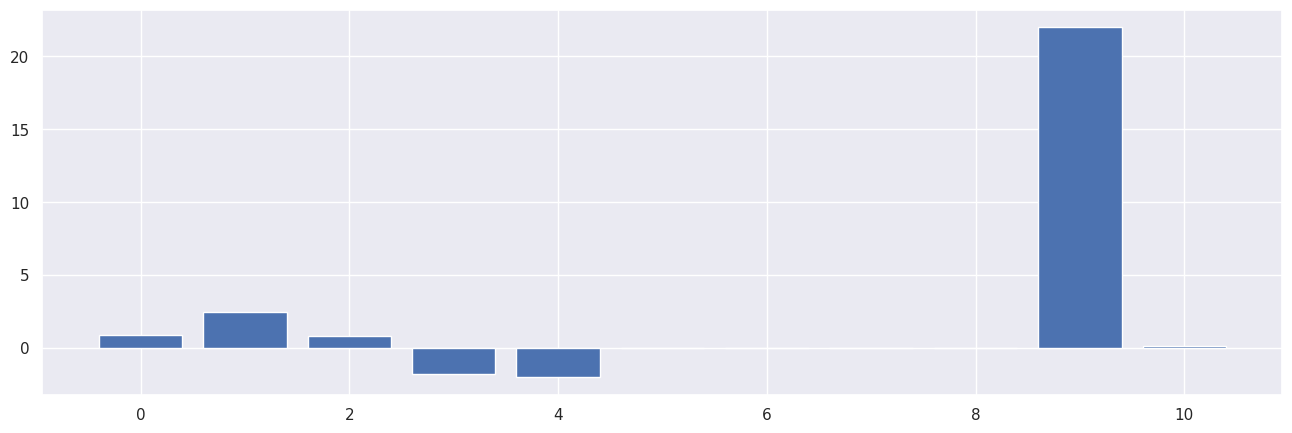

In [ ]:
print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

**NOTE: From feature importance => Credit History , ApplicantIncome , CoapplicantIncome, LoanAmount are the most important features**

# **Is the Data Balanced??**

**Heat map of dataset with relative importance**

<Axes: >

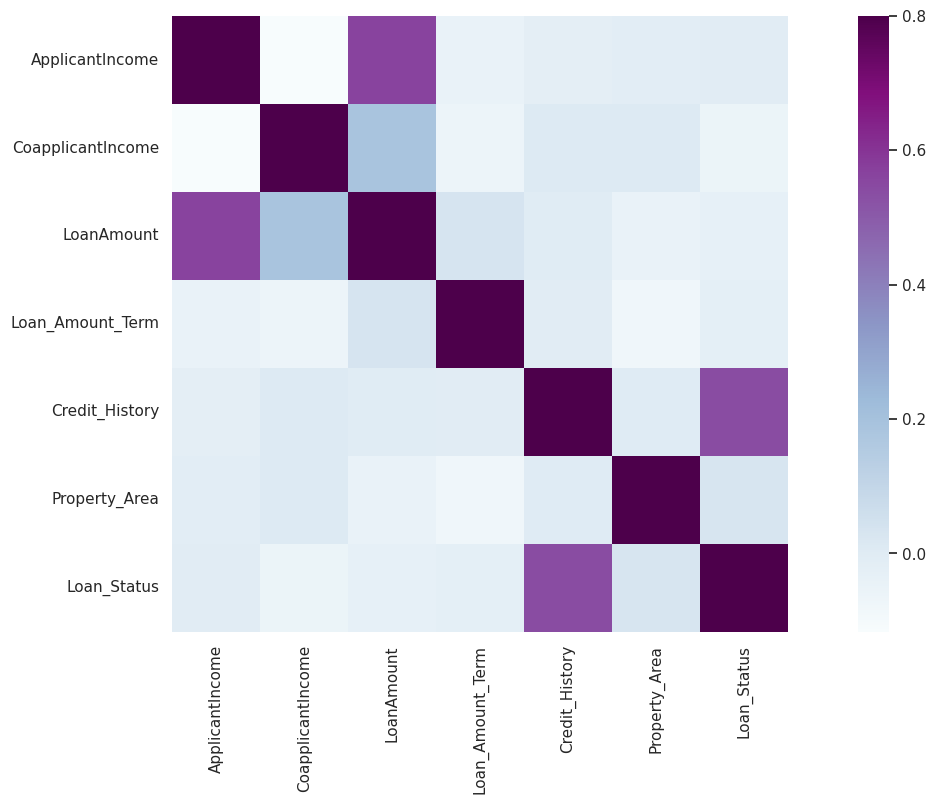

In [ ]:

matrix = input.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

**NOTE: It seems Application income and Loan Amount is correlated , also Coapplication income correlated with Loan Aount then Credit history is corrleated with Loan Status**

In [ ]:
A = list(input.Loan_Status).count(1)
B = list(input.Loan_Status).count(0)
print("Count of 1<Approved>: ",A,"\nCount of 0<Rejected>: ",B)

fig = px.bar((A,B),x=["Approved","Rejected"],y=[A,B],color=[A,B])
fig.show()

Count of 1<Approved>:  422 
Count of 0<Rejected>:  192


It seems that data is highly Imbalanced.

When the target classes does not have equal count then the data is considered as imbalanced data.

From above graph it seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status. 422 over 192

If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable.

Which will lead to make wrong assumptions by model and also model will be biased after training. We will overcome this issue by balancing the data.

To overcome this problem we will balance the data using Resampling technique with Upsample and Downsample.

**To Keep the original data as it is to use the same for the late parts**

In [ ]:
new_data = input.copy()

**Getting seperated data with 1 and 0 status**

In [ ]:
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

**Here we are Downsampling the Majority Class Data Points.
i.e. We will get equal amount of datapoint as Minority class from Majority class**

In [ ]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

Downsampled data:->
 1    192
0    192
Name: Loan_Status, dtype: int64


**Here we are Upampling the Majority Class Data Points. i.e. We will get equal amount of datapoint as Minority class from Majority class**

In [ ]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Upsampled data:->
 1    422
0    422
Name: Loan_Status, dtype: int64


NOTE: Data Standardization / Normalization Data normalization is required when the vriable values are in very distinct range.

For Ex. Suppose we have 2 columns "Age" and "Income"

Where value range of "Age" lying in 0-100 Approx. and value range of "Income" lying in 20,000 to 100,000

At this time model will perform poorly on testig data as all input values are not in same value range.

So not every time but whenever we get such type of data we need to normalized it i.e. Rescale it.

Widely used scaling tools are Min-Max Scaler and Standard-Scaler

Data Normalization is done by Min-Max Scaler which scales all th values between 0 to 1 range.

Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.

As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that it will reduce more skewness and contribute in accuracy gain

**Exeperimental Modelling**

Experimental Modeling In order to gain maximum posible accuracy one needs to conduct much emor experiments.

We will pass data on by one with different state i.e.

1- Only Scaled data

2- Scaled + Down Sampled Data

3- Scaled + Up Sampled Data

4- Scaled + Up Sampled Data + Selected feature with respective importance.

#**Exeperient 1: Only Scaled data**

In [ ]:
#X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data["Loan_Status"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Counter:  Counter({1: 422, 0: 192})


**Scaling the Data:**

In [ ]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

**Check mean is 0 and Standard deviation is 1**

In [ ]:

print("After Standardization\nMean ",np.mean(X_train),"\n""Standard Deviation ",np.std(X_train),"\n")

After Standardization
Mean  2.6680458457395066e-17 
Standard Deviation  1.0 



**Voting ensemble mathod. Combining all tree based algorithms**

In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        36
           1       0.88      0.83      0.86       118

    accuracy                           0.79       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.80      0.79      0.79       154

Voting Ensemble:> 0.7857142857142857


SUPPORT VECTOR MACHINE

In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312


XG BOOST

In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,
                     min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.37      0.43      0.40        37
           1       0.81      0.77      0.79       117

    accuracy                           0.69       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.71      0.69      0.70       154

XGBoost:> 0.6883116883116883


RANDOM FOREST

In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61        32
           1       0.92      0.84      0.88       122

    accuracy                           0.81       154
   macro avg       0.73      0.78      0.74       154
weighted avg       0.84      0.81      0.82       154

RandomForestClassifier:> 0.8116883116883117


# **Comparision between the three models**

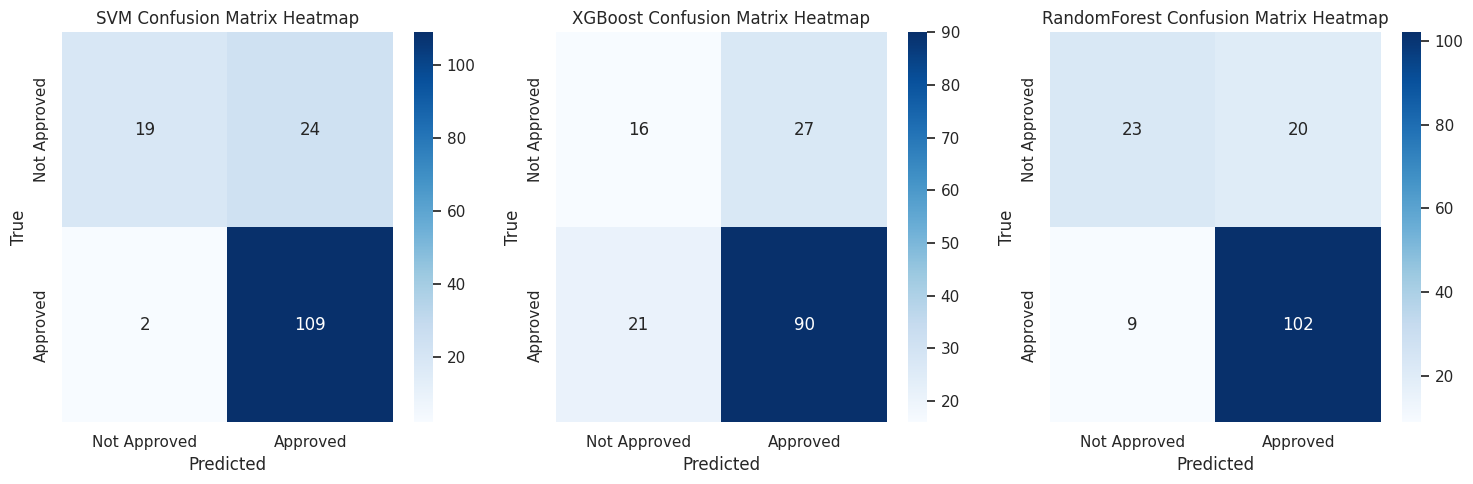

Correlation Evaluation Metric - SVM: 0.5540700787435564
Correlation Evaluation Metric - XGBoost: 0.1920546088339213
Correlation Evaluation Metric - RandomForest: 0.5017736262563736


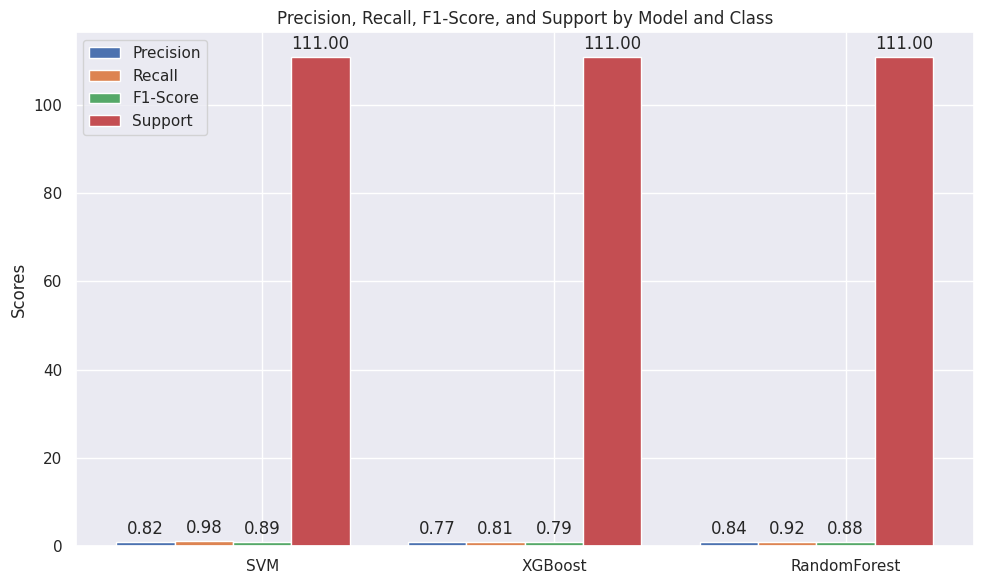

In [ ]:
# Create and fit SVM model
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_rep_svm = classification_report(y_test, y_pred_svm, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit XGBoost model
XGBC = XGBClassifier(learning_rate=0.1, n_estimators=10000, max_depth=4,
                     min_child_weight=6, gamma=0, subsample=0.6, colsample_bytree=0.8,
                     reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27, eval_metric="logloss")
XGBC.fit(X_train, y_train)
y_pred_xgbc = XGBC.predict(X_test)
conf_matrix_xgbc = confusion_matrix(y_test, y_pred_xgbc)
class_rep_xgbc = classification_report(y_test, y_pred_xgbc, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit RandomForest model
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred_model1 = Model1.predict(X_test)
conf_matrix_model1 = confusion_matrix(y_test, y_pred_model1)
class_rep_model1 = classification_report(y_test, y_pred_model1, target_names=["Not Approved", "Approved"], output_dict=True)

# Function to calculate correlation evaluation metric
def calculate_correlation(conf_matrix):
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    correlation = (true_positive * true_negative - false_positive * false_negative) / \
                   ((true_positive + false_positive) * (true_positive + false_negative) *
                    (true_negative + false_positive) * (true_negative + false_negative)) ** 0.5
    return correlation

# Calculate correlation evaluation metric for each model
correlation_svm = calculate_correlation(conf_matrix_svm)
correlation_xgbc = calculate_correlation(conf_matrix_xgbc)
correlation_model1 = calculate_correlation(conf_matrix_model1)

# Create a heatmap for each confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix Heatmap")

plt.subplot(132)
sns.heatmap(conf_matrix_xgbc, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix Heatmap")

plt.subplot(133)
sns.heatmap(conf_matrix_model1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("RandomForest Confusion Matrix Heatmap")

plt.tight_layout()
plt.show()

# Visualization of evaluation metrics for precision, recall, F1-score, and support
models = ['SVM', 'XGBoost', 'RandomForest']
precision_values = [class_rep_svm["Approved"]["precision"], class_rep_xgbc["Approved"]["precision"], class_rep_model1["Approved"]["precision"]]
recall_values = [class_rep_svm["Approved"]["recall"], class_rep_xgbc["Approved"]["recall"], class_rep_model1["Approved"]["recall"]]
f1_score_values = [class_rep_svm["Approved"]["f1-score"], class_rep_xgbc["Approved"]["f1-score"], class_rep_model1["Approved"]["f1-score"]]
support_values = [class_rep_svm["Approved"]["support"], class_rep_xgbc["Approved"]["support"], class_rep_model1["Approved"]["support"]]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision_values, width, label='Precision')
rects2 = ax.bar(x, recall_values, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_values, width, label='F1-Score')
rects4 = ax.bar(x + 2 * width, support_values, width, label='Support')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score, and Support by Model and Class')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display Correlation Metrics
print("Correlation Evaluation Metric - SVM:", correlation_svm)
print("Correlation Evaluation Metric - XGBoost:", correlation_xgbc)
print("Correlation Evaluation Metric - RandomForest:", correlation_model1)

plt.tight_layout()
plt.show()


# **Experient 2: Scaled + Down Sampled Data**

In [ ]:
#X = df_downsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Scaling the Data**

In [ ]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

**Check mean is 0 and Standard deviation is 1**

In [ ]:
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

After Standardization
Mean  2.0185873175002847e-17 Standard Deviation  1.0 



**Voting ensemble mathod. Combining all tree based algorithms**

In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.77      0.71      0.74        52

    accuracy                           0.73        96
   macro avg       0.73      0.73      0.73        96
weighted avg       0.73      0.73      0.73        96

Voting Ensemble:> 0.7291666666666666


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.42      1.00      0.59        20
           1       1.00      0.63      0.77        76

    accuracy                           0.71        96
   macro avg       0.71      0.82      0.68        96
weighted avg       0.88      0.71      0.74        96

SVM:> 0.7083333333333334


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,
                     min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.65      0.67      0.66        46

    accuracy                           0.67        96
   macro avg       0.67      0.67      0.67        96
weighted avg       0.67      0.67      0.67        96

XGBoost:> 0.6666666666666666


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68        37
           1       0.83      0.68      0.75        59

    accuracy                           0.72        96
   macro avg       0.72      0.73      0.72        96
weighted avg       0.75      0.72      0.72        96

RandomForestClassifier:> 0.71875


# **Comparision between the three models**

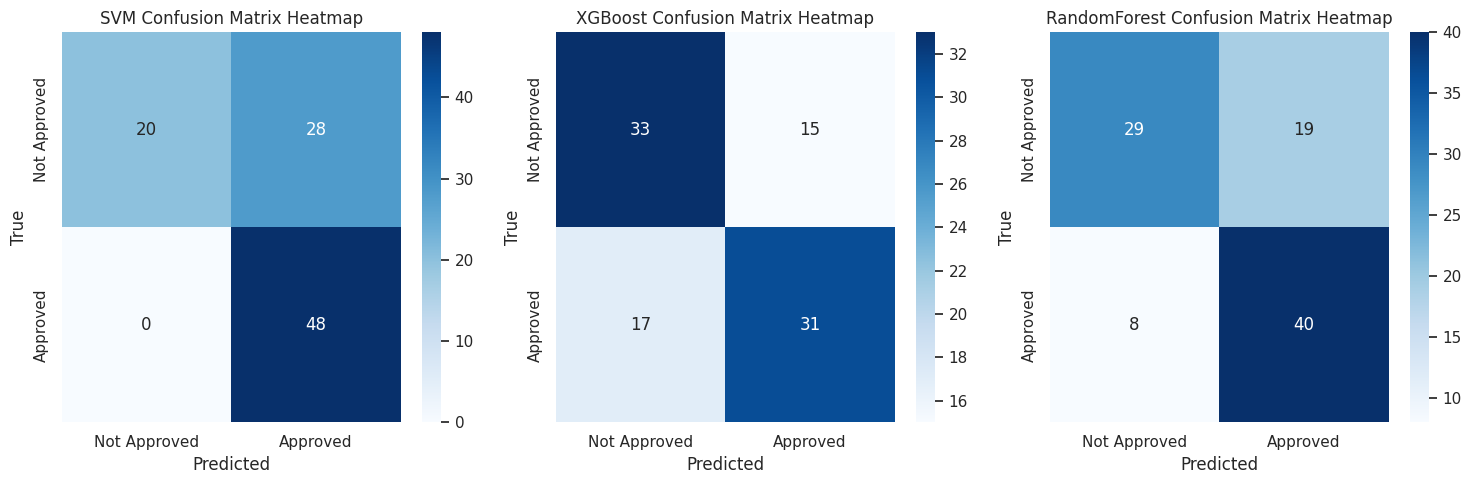

Correlation Evaluation Metric - SVM: 0.5129891760425771
Correlation Evaluation Metric - XGBoost: 0.3336230624913196
Correlation Evaluation Metric - RandomForest: 0.44946142759632984


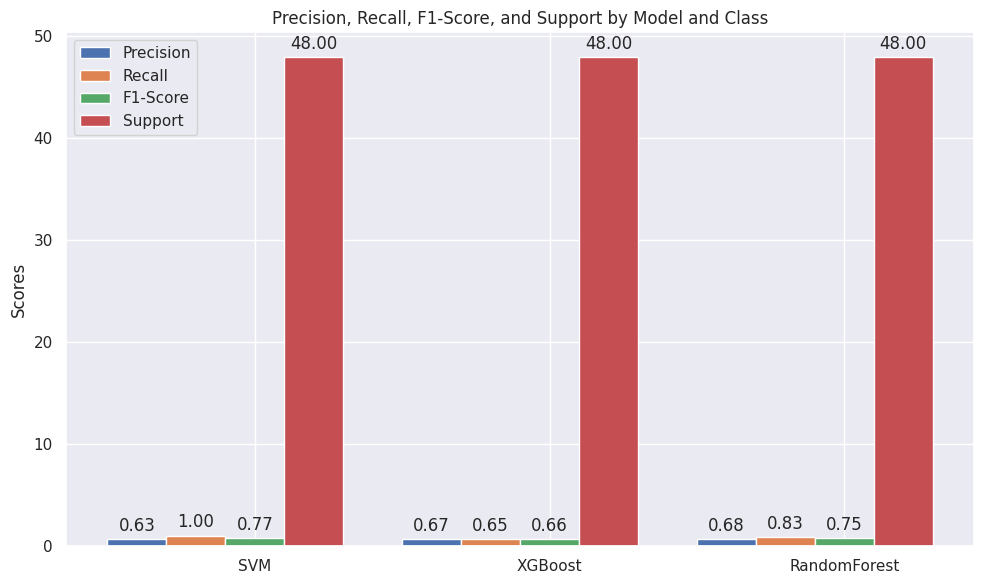

In [ ]:
# Create and fit SVM model
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_rep_svm = classification_report(y_test, y_pred_svm, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit XGBoost model
XGBC = XGBClassifier(learning_rate=0.1, n_estimators=10000, max_depth=4,
                     min_child_weight=6, gamma=0, subsample=0.6, colsample_bytree=0.8,
                     reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27, eval_metric="logloss")
XGBC.fit(X_train, y_train)
y_pred_xgbc = XGBC.predict(X_test)
conf_matrix_xgbc = confusion_matrix(y_test, y_pred_xgbc)
class_rep_xgbc = classification_report(y_test, y_pred_xgbc, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit RandomForest model
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred_model1 = Model1.predict(X_test)
conf_matrix_model1 = confusion_matrix(y_test, y_pred_model1)
class_rep_model1 = classification_report(y_test, y_pred_model1, target_names=["Not Approved", "Approved"], output_dict=True)

# Function to calculate correlation evaluation metric
def calculate_correlation(conf_matrix):
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    correlation = (true_positive * true_negative - false_positive * false_negative) / \
                   ((true_positive + false_positive) * (true_positive + false_negative) *
                    (true_negative + false_positive) * (true_negative + false_negative)) ** 0.5
    return correlation

# Calculate correlation evaluation metric for each model
correlation_svm = calculate_correlation(conf_matrix_svm)
correlation_xgbc = calculate_correlation(conf_matrix_xgbc)
correlation_model1 = calculate_correlation(conf_matrix_model1)

# Create a heatmap for each confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix Heatmap")

plt.subplot(132)
sns.heatmap(conf_matrix_xgbc, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix Heatmap")

plt.subplot(133)
sns.heatmap(conf_matrix_model1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("RandomForest Confusion Matrix Heatmap")

plt.tight_layout()
plt.show()

# Visualization of evaluation metrics for precision, recall, F1-score, and support
models = ['SVM', 'XGBoost', 'RandomForest']
precision_values = [class_rep_svm["Approved"]["precision"], class_rep_xgbc["Approved"]["precision"], class_rep_model1["Approved"]["precision"]]
recall_values = [class_rep_svm["Approved"]["recall"], class_rep_xgbc["Approved"]["recall"], class_rep_model1["Approved"]["recall"]]
f1_score_values = [class_rep_svm["Approved"]["f1-score"], class_rep_xgbc["Approved"]["f1-score"], class_rep_model1["Approved"]["f1-score"]]
support_values = [class_rep_svm["Approved"]["support"], class_rep_xgbc["Approved"]["support"], class_rep_model1["Approved"]["support"]]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision_values, width, label='Precision')
rects2 = ax.bar(x, recall_values, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_values, width, label='F1-Score')
rects4 = ax.bar(x + 2 * width, support_values, width, label='Support')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score, and Support by Model and Class')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display Correlation Metrics
print("Correlation Evaluation Metric - SVM:", correlation_svm)
print("Correlation Evaluation Metric - XGBoost:", correlation_xgbc)
print("Correlation Evaluation Metric - RandomForest:", correlation_model1)

plt.tight_layout()
plt.show()


# **Experient 3: Scaled + Up Sampled Data**

In [ ]:
#X = df_upsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

844 844


**Scaling the Data**

In [ ]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

**Check mean is 0 and Standard deviation is 1**

In [ ]:
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")


After Standardization
Mean  -6.428865769479579e-17 Standard Deviation  1.0 



**Voting ensemble mathod. Combining all tree based algorithms**

In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        92
           1       0.87      0.76      0.81       119

    accuracy                           0.80       211
   macro avg       0.80      0.81      0.80       211
weighted avg       0.81      0.80      0.80       211

Voting Ensemble:> 0.8009478672985783


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.39      0.93      0.55        45
           1       0.97      0.60      0.74       166

    accuracy                           0.67       211
   macro avg       0.68      0.77      0.65       211
weighted avg       0.85      0.67      0.70       211

SVM:> 0.6729857819905213


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,
                     min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        93
           1       0.71      0.62      0.66       118

    accuracy                           0.64       211
   macro avg       0.65      0.65      0.64       211
weighted avg       0.65      0.64      0.65       211

XGBoost:> 0.6445497630331753


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        88
           1       0.91      0.76      0.83       123

    accuracy                           0.82       211
   macro avg       0.82      0.83      0.82       211
weighted avg       0.84      0.82      0.82       211

RandomForestClassifier:> 0.8199052132701422


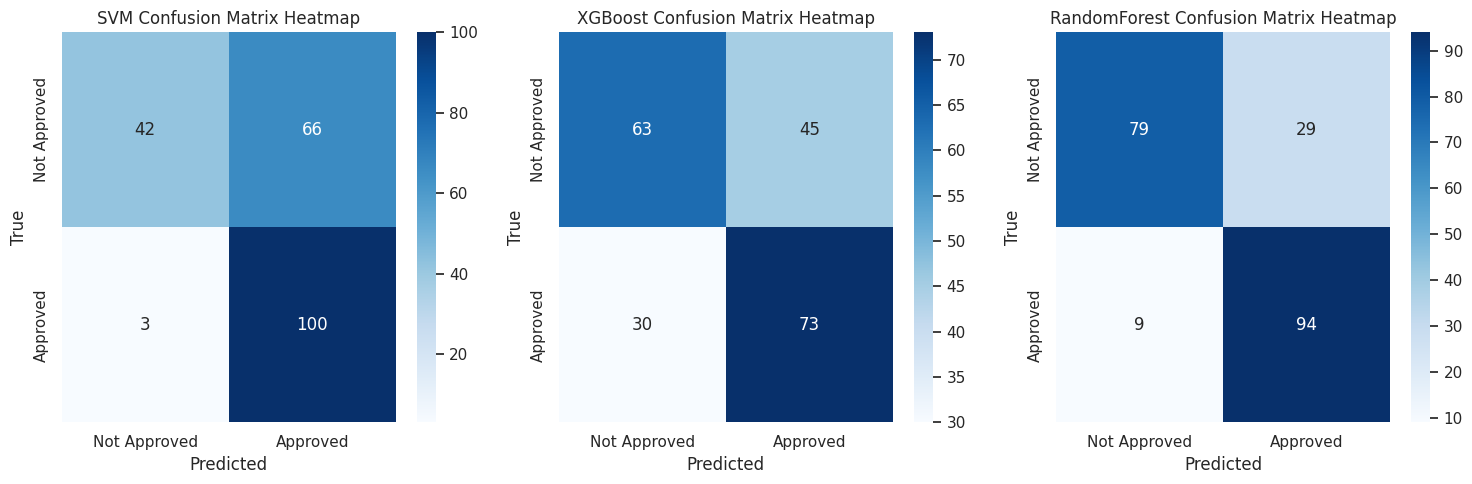

Correlation Evaluation Metric - SVM: 0.4390220095139265
Correlation Evaluation Metric - XGBoost: 0.2940605351941974
Correlation Evaluation Metric - RandomForest: 0.6529678714702379


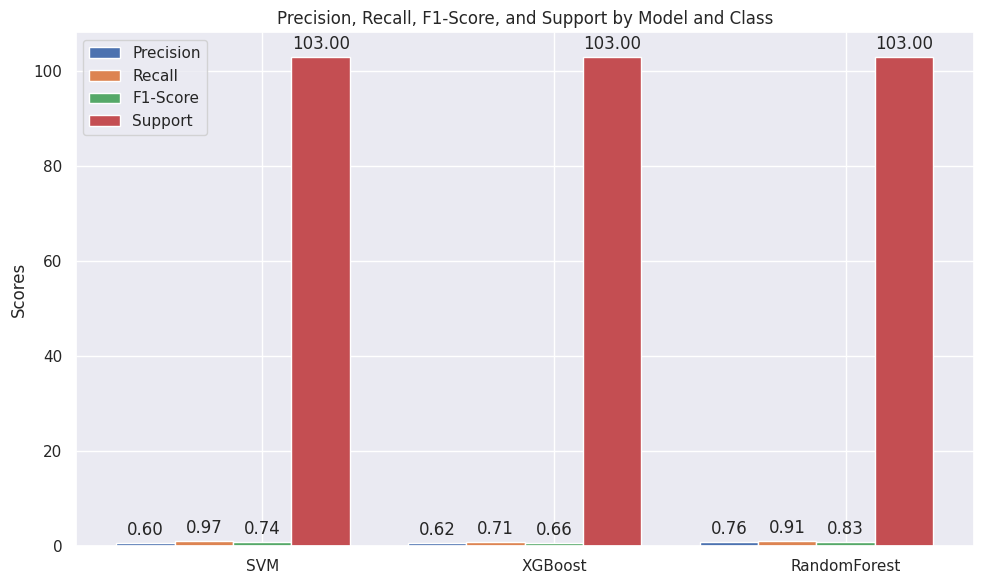

In [ ]:
# Create and fit SVM model
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_rep_svm = classification_report(y_test, y_pred_svm, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit XGBoost model
XGBC = XGBClassifier(learning_rate=0.1, n_estimators=10000, max_depth=4,
                     min_child_weight=6, gamma=0, subsample=0.6, colsample_bytree=0.8,
                     reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27, eval_metric="logloss")
XGBC.fit(X_train, y_train)
y_pred_xgbc = XGBC.predict(X_test)
conf_matrix_xgbc = confusion_matrix(y_test, y_pred_xgbc)
class_rep_xgbc = classification_report(y_test, y_pred_xgbc, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit RandomForest model
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred_model1 = Model1.predict(X_test)
conf_matrix_model1 = confusion_matrix(y_test, y_pred_model1)
class_rep_model1 = classification_report(y_test, y_pred_model1, target_names=["Not Approved", "Approved"], output_dict=True)

# Function to calculate correlation evaluation metric
def calculate_correlation(conf_matrix):
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    correlation = (true_positive * true_negative - false_positive * false_negative) / \
                   ((true_positive + false_positive) * (true_positive + false_negative) *
                    (true_negative + false_positive) * (true_negative + false_negative)) ** 0.5
    return correlation

# Calculate correlation evaluation metric for each model
correlation_svm = calculate_correlation(conf_matrix_svm)
correlation_xgbc = calculate_correlation(conf_matrix_xgbc)
correlation_model1 = calculate_correlation(conf_matrix_model1)

# Create a heatmap for each confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix Heatmap")

plt.subplot(132)
sns.heatmap(conf_matrix_xgbc, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix Heatmap")

plt.subplot(133)
sns.heatmap(conf_matrix_model1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("RandomForest Confusion Matrix Heatmap")

plt.tight_layout()
plt.show()

# Visualization of evaluation metrics for precision, recall, F1-score, and support
models = ['SVM', 'XGBoost', 'RandomForest']
precision_values = [class_rep_svm["Approved"]["precision"], class_rep_xgbc["Approved"]["precision"], class_rep_model1["Approved"]["precision"]]
recall_values = [class_rep_svm["Approved"]["recall"], class_rep_xgbc["Approved"]["recall"], class_rep_model1["Approved"]["recall"]]
f1_score_values = [class_rep_svm["Approved"]["f1-score"], class_rep_xgbc["Approved"]["f1-score"], class_rep_model1["Approved"]["f1-score"]]
support_values = [class_rep_svm["Approved"]["support"], class_rep_xgbc["Approved"]["support"], class_rep_model1["Approved"]["support"]]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision_values, width, label='Precision')
rects2 = ax.bar(x, recall_values, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_values, width, label='F1-Score')
rects4 = ax.bar(x + 2 * width, support_values, width, label='Support')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score, and Support by Model and Class')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display Correlation Metrics
print("Correlation Evaluation Metric - SVM:", correlation_svm)
print("Correlation Evaluation Metric - XGBoost:", correlation_xgbc)
print("Correlation Evaluation Metric - RandomForest:", correlation_model1)

plt.tight_layout()
plt.show()


# **Experient 4: Scaled + Selected features with respective importance**

**Droping features which are less important and keeping features as per importance analysis**

In [ ]:
X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
#X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

614 614


**Scaling the Data**

In [ ]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

**Check mean is 0 and Standard deviation is 1**

In [ ]:
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

After Standardization
Mean  1.004027778791446e-17 Standard Deviation  1.0 



**Voting ensemble mathod. Combining all tree based algorithms**

In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))


ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        43
           1       0.83      0.83      0.83       111

    accuracy                           0.75       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.75      0.75      0.75       154

Voting Ensemble:> 0.7532467532467533


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,
                     min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.35      0.41      0.38        37
           1       0.80      0.76      0.78       117

    accuracy                           0.68       154
   macro avg       0.58      0.58      0.58       154
weighted avg       0.69      0.68      0.68       154

XGBoost:> 0.6753246753246753


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57        34
           1       0.89      0.82      0.86       120

    accuracy                           0.79       154
   macro avg       0.70      0.74      0.71       154
weighted avg       0.81      0.79      0.79       154

RandomForestClassifier:> 0.7857142857142857


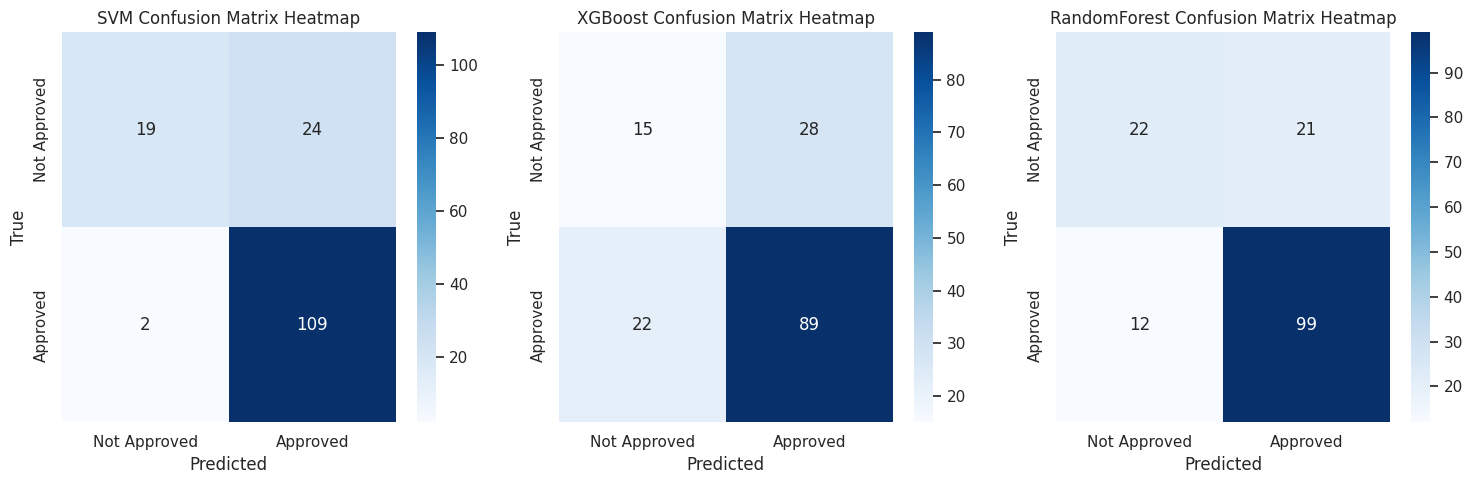

Correlation Evaluation Metric - SVM: 0.5540700787435564
Correlation Evaluation Metric - XGBoost: 0.15817555985290885
Correlation Evaluation Metric - RandomForest: 0.4364459663288838


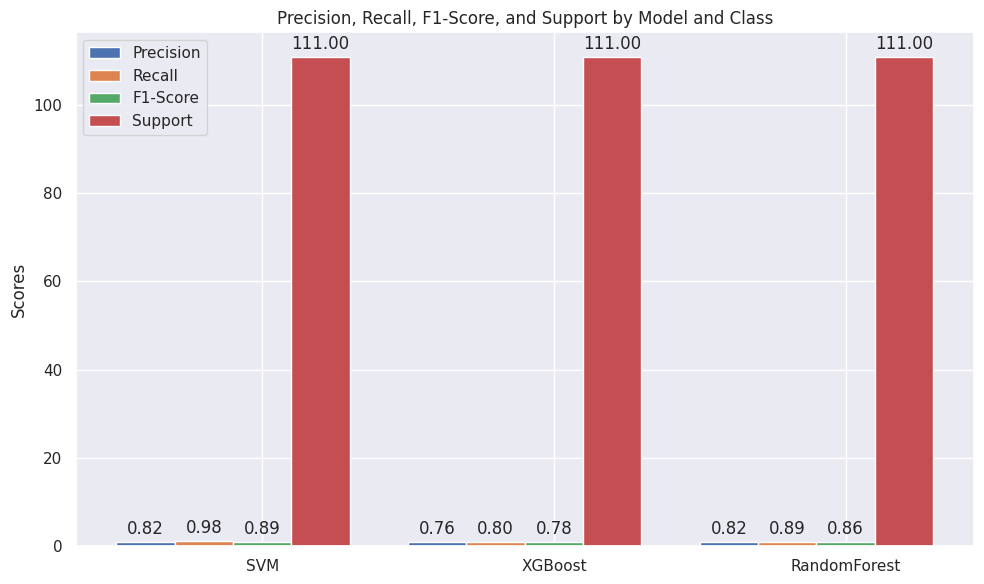

In [ ]:
# Create and fit SVM model
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_rep_svm = classification_report(y_test, y_pred_svm, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit XGBoost model
XGBC = XGBClassifier(learning_rate=0.1, n_estimators=10000, max_depth=4,
                     min_child_weight=6, gamma=0, subsample=0.6, colsample_bytree=0.8,
                     reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1,
                     seed=27, eval_metric="logloss")
XGBC.fit(X_train, y_train)
y_pred_xgbc = XGBC.predict(X_test)
conf_matrix_xgbc = confusion_matrix(y_test, y_pred_xgbc)
class_rep_xgbc = classification_report(y_test, y_pred_xgbc, target_names=["Not Approved", "Approved"], output_dict=True)

# Create and fit RandomForest model
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred_model1 = Model1.predict(X_test)
conf_matrix_model1 = confusion_matrix(y_test, y_pred_model1)
class_rep_model1 = classification_report(y_test, y_pred_model1, target_names=["Not Approved", "Approved"], output_dict=True)

# Function to calculate correlation evaluation metric
def calculate_correlation(conf_matrix):
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    correlation = (true_positive * true_negative - false_positive * false_negative) / \
                   ((true_positive + false_positive) * (true_positive + false_negative) *
                    (true_negative + false_positive) * (true_negative + false_negative)) ** 0.5
    return correlation

# Calculate correlation evaluation metric for each model
correlation_svm = calculate_correlation(conf_matrix_svm)
correlation_xgbc = calculate_correlation(conf_matrix_xgbc)
correlation_model1 = calculate_correlation(conf_matrix_model1)

# Create a heatmap for each confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix Heatmap")

plt.subplot(132)
sns.heatmap(conf_matrix_xgbc, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix Heatmap")

plt.subplot(133)
sns.heatmap(conf_matrix_model1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("RandomForest Confusion Matrix Heatmap")

plt.tight_layout()
plt.show()

# Visualization of evaluation metrics for precision, recall, F1-score, and support
models = ['SVM', 'XGBoost', 'RandomForest']
precision_values = [class_rep_svm["Approved"]["precision"], class_rep_xgbc["Approved"]["precision"], class_rep_model1["Approved"]["precision"]]
recall_values = [class_rep_svm["Approved"]["recall"], class_rep_xgbc["Approved"]["recall"], class_rep_model1["Approved"]["recall"]]
f1_score_values = [class_rep_svm["Approved"]["f1-score"], class_rep_xgbc["Approved"]["f1-score"], class_rep_model1["Approved"]["f1-score"]]
support_values = [class_rep_svm["Approved"]["support"], class_rep_xgbc["Approved"]["support"], class_rep_model1["Approved"]["support"]]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision_values, width, label='Precision')
rects2 = ax.bar(x, recall_values, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_values, width, label='F1-Score')
rects4 = ax.bar(x + 2 * width, support_values, width, label='Support')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score, and Support by Model and Class')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display Correlation Metrics
print("Correlation Evaluation Metric - SVM:", correlation_svm)
print("Correlation Evaluation Metric - XGBoost:", correlation_xgbc)
print("Correlation Evaluation Metric - RandomForest:", correlation_model1)

plt.tight_layout()
plt.show()
